In [1]:
# change working directory to the project root
import os
os.chdir('../../')

import sys
sys.path.append('models/utils')
sys.path.append('models/brian2')
sys.path.append('models/aln')

In [2]:
# import python packages
from __future__ import print_function
import os
import datetime
import tqdm
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import scipy 
import pandas as pd
import pypet as pp

# import utils libs
import pypet_parameters as pe
import fitparams as fp
import functions as func
import runModels as rm
import paths

In [3]:
# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = 'plasma'

In [4]:
params = []
params = fp.loadpoint(params, "A2")

params['dt'] = 0.1
params['duration'] =  6000 
params['sigma_ou'] = 0.0

N_neurons = 10000
params['N'] = N_neurons
params['model'] = 'brian'

# Parameter exploration

In [5]:
res = 31
parametrization = pp.cartesian_product({
    'mue_ext_mean':[ round(elem, 3) for elem in np.linspace(0.0, 3.0, res)],
    'mui_ext_mean':[ round(elem, 3) for elem in np.linspace(0.0, 3.0, res)],
    'Jee_max' : [params['Jee_max']-0.5, params['Jee_max']+0.5,\
                params['Jee_max'], params['Jee_max'], params['Jee_max'], params['Jee_max'], params['Jee_max'], params['Jee_max']]
})
print("{} parameterizations".format(len(parametrization[parametrization.keys()[0]])))

7688 parameterizations


In [6]:
Js = ['Jie_max', 'Jei_max', 'Jii_max']
#for J in Js:
for k, J in zip(range(8)[2::2], Js):
    
    print(J)
    parametrization[J] = []
    print(k, 8-k-2)
    for i in range(k*res**2):
        parametrization[J].append(params[J])
    for i in range(res**2):
        parametrization[J].append(params[J]-0.5)
    for i in range(res**2):
        parametrization[J].append(params[J]+0.5)
    for i in range((8-k-2)*res**2):
        parametrization[J].append(params[J])

Jie_max
2 4
Jei_max
4 2
Jii_max
6 0


In [7]:
len(parametrization['Jie_max'])

7688

## Run simulations

In [9]:
paths.BRIAN2_COMPILE_DIR = '/mnt/fastio/cakan/brian2_compile/'

In [10]:
paths.HDF_DIR = '/mnt/fastio/cakan/hdf-reviewer-questions'

In [11]:
# ---- initialize pypet environment ----
trajectoryName = 'results' + datetime.datetime.now().strftime("-%Y-%m-%d-%HH-%MM-%SS")
HDF_FILE = os.path.join(paths.HDF_DIR, 'brian-grid-J.hdf')
trajectoryFileName = HDF_FILE

import multiprocessing
ncores = multiprocessing.cpu_count()
print("Number of cores: {}".format(ncores))



env = pp.Environment(trajectory=trajectoryName,filename=trajectoryFileName,
                    file_title='adex network bifurcation diagrams with different coupling strengths J',
                    large_overview_tables=True,
                    multiproc=True,           
                    ncores=ncores,
                    wrap_mode='QUEUE',
                    log_stdout = False
                    )

# Get the trajectory from the environment
traj = env.v_trajectory
trajectoryName = traj.v_name

pe.add_parameters(traj, params)

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `/mnt/fastio/cakan/hdf-reviewer-questions/brian-grid-J.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.


Number of cores: 80


In [ ]:
traj.f_explore(parametrization)
env.f_run(rm.runModels_stimulus)
env.f_disable_logging()
print("Done.")

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2019-12-08-19H-26M-39S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2019-12-08-19H-26M-39S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2019-12-08-19H-26M-39S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2019-12-08-19H-26M-39S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `resu

Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 10000 excitato

# Data processing

## Load results from disk

In [15]:
HDF_FILE = os.path.join(paths.HDF_DIR, 'brian-grid-J.hdf')
trajectoryFileName = HDF_FILE

In [16]:
# ---- load pypet trajectory "trajectoryFileName" ----
print("Analyzing File \"{}\"".format(trajectoryFileName))
print("All Trajectories:")
print(pe.getTrajectoryNameInsideFile(trajectoryFileName))
trajectoryName = pe.getTrajectoryNameInsideFile(trajectoryFileName)[-1]

print("Analyzing trajectory \"{}\".".format(trajectoryName))
trajLoaded = pp.Trajectory(trajectoryName,add_time=False)
trajLoaded.f_load(trajectoryName,filename=trajectoryFileName, force=True)
trajLoaded.v_auto_load = True
print("{} results found".format(len(trajLoaded.f_get_results())))

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `/mnt/fastio/cakan/hdf-reviewer-questions/brian-grid-J.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2019-12-08-19H-26M-39S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


Analyzing File "/mnt/fastio/cakan/hdf-reviewer-questions/brian-grid-J.hdf"
All Trajectories:
[u'results-2019-12-08-19H-26M-39S']
Analyzing trajectory "results-2019-12-08-19H-26M-39S".


MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.


7688 results found


## Process data

In [17]:
nResults = len(trajLoaded.f_get_run_names()) # number of results in trajectory 
dt = trajLoaded.f_get_parameters()['parameters.simulation.dt'].f_get() # dt of simulation

# ---- explored parameter list ----
exploredParameters = trajLoaded.f_get_explored_parameters()
niceParKeys = [p.split('.')[-1] for p in exploredParameters.keys()]

# ---- lcreate pandas df with results as keys ----
dfResults = pd.DataFrame(columns=niceParKeys,dtype=object)

# range of parameters
for nicep, p in zip(niceParKeys,exploredParameters.keys()):
    dfResults[nicep] = exploredParameters[p].f_get_range()

### Serial Processing

In [18]:
# ---- make a dictionary with results ----
resultDicts = []
makeDict = True

#measures = ['domfr_exc', 'domfr_power_exc', 'max_exc', 'min_exc', 'updowndiff_exc', 'domfr_inh','domfr_power_inh', 'max_inh', 'min_inh', 'updowndiff_inh'] 
measures = ['domfr_exc', 'max_exc', 'updowndiff_exc', 'domfr_power_exc', 'max_inh']

for rInd in tqdm.tqdm(range(nResults), total=nResults):
    
    for measure in measures:
        dfResults.loc[rInd, measure] = func.analyse_run(measure, trajLoaded.results[rInd].f_to_dict(), dt)    
    if makeDict:
            resultDicts.append(trajLoaded.results[rInd].f_to_dict())
            
print("done.")

100%|██████████| 7688/7688 [10:40<00:00,  8.51it/s]

done.


### Parallel Processing

In [ ]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()   

# ---- make a dictionary with results ----
resultDicts = []
makeDict = False
print("Creating results dictionary ...")
runResults = []
for rInd in range(len(dfResults)):
    result = trajLoaded.results[rInd].f_to_dict()
    runResults.append(result)
    if makeDict:
        resultDicts.append(result)
print("done.")

for measure in ['domfr_exc', 'max_exc', 'updowndiff_exc', 'domfr_power_exc', 'max_inh']:
    print("Analysing measure: {}".format(measure))
    parallelResults = Parallel(n_jobs=num_cores)(delayed(func.analyse_run)(measure = measure, result = i, dt = dt) for i in runResults)
    dfResults[measure] = parallelResults
print("done.")

In [ ]:
import pickle
file_path_p = os.path.join(paths.PICKLE_DIR, 'brian-grid-adaptation-bifurcation-dfResults.p')
#pickle.dump(dfResults, file(file_path_p, "w"))

## Load processed results from file

In [ ]:
import pickle
file_path_p = os.path.join(paths.PICKLE_DIR, 'brian-grid-adaptation-bifurcation-dfResults.p')
#dfResults = pickle.load(file(file_path_p, "r"))

# Plot data

In [19]:
def annotate_plot(point, model, ax):
    fs = 16
    fw = 'regular'
    pad = 3
    if point[0] == 'A':
        if model == 'brian':
            # attractor labels -------------
            ax.text(0.8,0.25, 'up', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.35,0.06, 'LC$_{EI}$', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.25,0.65, 'down', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.8,0.65, 'bi', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)

        else:
            # attractor labels -------------
            ax.text(3.5,0.75, 'up', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(0.7,0.3, 'LC$_{EI}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(0.4,1.9, 'down', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(2.3,2.7, 'bi', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
    elif point[0] == 'B':
        if model == 'brian':
            # attractor labels -------------
            ax.text(0.88,0.25, 'up', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.5,0.06, 'LC$_{EI}$', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.3,0.7, 'down', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.68,0.39, 'LC$_{aE}$', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
        else:
            # attractor labels -------------
            ax.text(2.5, 0.3, u'LC$_{EI}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(4.0, 2.8, u'LC$_{aE}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(1.6, 2.75, 'down', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(5.0, 1.0, 'up', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            

In [89]:
up_down_threshold_hz = 10 # minimum difrernce of population rate between up and down state for bistable classification
domfr_threshold = 0.5 # minimum dominant frequency of an oscillation for classification

def plotResults(selectedResults, plot='max_exc', ax=None, pos=(0, 0), title=None):
    plot_results = []
    amplitudes = []
    frequencies = []
    oscillation_powers = []
    max_inh_rates = []

    up_down_differences = []
    
    for i in range(len(selectedResults)):
        plot_results.append(selectedResults.iloc[i][plot])
        frequencies.append(selectedResults.iloc[i]['domfr_exc'])
        up_down_differences.append(selectedResults.iloc[i]['updowndiff_exc'])
    
    mues = np.unique(selectedResults['mue_ext_mean'])  
    muis = np.unique(selectedResults['mui_ext_mean'])    
    
    # prepare matrixes for plotting
    plot_results_matrix = np.reshape(plot_results, (len(mues), len(muis))).T
    frequencies_matrix = np.reshape(frequencies, (len(mues), len(muis))).T
    up_down_differences_matrix = np.reshape(up_down_differences, (len(mues), len(muis))).T
    
    # Fill in NaN's...
    mask = np.isnan(plot_results_matrix)
    plot_results_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), plot_results_matrix[~mask])
    mask = np.isnan(frequencies_matrix)
    frequencies_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), frequencies_matrix[~mask])
    mask = np.isnan(up_down_differences_matrix)
    up_down_differences_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), up_down_differences_matrix[~mask])  
    
    # --------------------------
    # -------  PLOTTING  -------
    # --------------------------
    
    C = 1 # Capacitance, convert mV/ms to nA (depricated!!)
    
    if ax==None:
        print('new figure')
        plt.figure(figsize=(3,3), dpi=300)
        ax = plt.gca()
        
    cmap = 'BuPu_r'
    if pos[0]==pos[1]:
        cmap = 'plasma' # change color on the diagonal
        
    im = ax.imshow(plot_results_matrix, origin='lower', aspect='auto', clim = (0, 80), cmap=cmap,\
                   extent = [mues[0], mues[-1], muis[0], muis[-1]])
    
    ax.tick_params(labelsize=20) 
    
    if pos==(0, 0):
        #ax.set_xlabel("Input to E [nA]", fontsize=20)
        #ax.set_ylabel("Input to I [nA]", fontsize=20)
        # force integer ticks
        plt.locator_params(nbins=4)
        
        # multiply axis ticks with capacitance C to get nA 
        ax.set_xticklabels(np.round(np.multiply(ax.get_xticks(),0.2),2)) 
        ax.set_yticklabels(np.round(np.multiply(ax.get_yticks(),0.2),2)) 
        ax.tick_params(labelsize=15) 
        
        #annotate_plot('A', 'aln', ax) # annotate attractors
        
    elif pos == (2, 2):
        #annotate_plot('B', 'aln', ax) # annotate attractors
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.set_xticks([])
        ax.set_yticks([])
        
    # ----- LC contour -----
    Z=frequencies_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(frequencies_matrix,0.0) # blurred
    Z = blurredZ.copy()
    frequency_threshold = domfr_threshold
    Z[Z<frequency_threshold] = 0
    Z[Z>=frequency_threshold] = 1

    Xi,Yi = np.meshgrid(mues, muis)
    cset2 = ax.contour(Xi, Yi, Z, colors='white', linestyles='solid', levels=[0, 1.0001], linewidths=(7,),zorder=1)
    
    # ----- bistability contour -----
    Z=up_down_differences_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(up_down_differences_matrix,0.0) # blurred
    Z = blurredZ.copy()
    up_down_threshold = up_down_threshold_hz
    Z[Z<up_down_threshold] = 0
    Z[Z>=up_down_threshold] = 1

    Xi,Yi = np.meshgrid(mues, muis)
    levels = np.arange(0,1,1)
    cset2 = ax.contour(Xi, Yi, Z, colors='springgreen', linestyles='dashed', levels=[0, 1.0001], linewidths=(7,),zorder=2)
    
    
    # ------ annotate
    if title is not None:
        txt = ax.text(0.03, 0.83, title, transform=ax.transAxes, fontsize=10, color='white', ha='left')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])    

    if ax==None:
        plt.show()
    return im

In [ ]:
# Plot individually, uncomment last lines to plot, takes a while, can be skipped to next cell
Jee_range = np.unique(dfResults.Jee_max)
Jii_range = np.unique(dfResults.Jii_max)
Jei_range = np.unique(dfResults.Jei_max)
Jie_range = np.unique(dfResults.Jie_max)

for jee in Jee_range:
    for jii in Jii_range:
        for jei in Jei_range:
            for jie in Jie_range:
                selector = (dfResults.Jee_max==jee) & (dfResults.Jii_max==jii) & (dfResults.Jei_max==jei) &(dfResults.Jie_max==jie)
                selectedResults = dfResults[selector]
                selectIndices = selectedResults.index
                try:
                    title = "$J_{{ee}}$={}, $J_{{ii}}$={}\n$J_{{ei}}$={}, $J_{{ie}}$={}".format(jee, jii, jei, jie)
                    plotResults(selectedResults, 'max_exc', title=title)
                    print(title)
                except:
                    pass
                #plotResults(selectedResults, 'domfr_exc')
                #plotResults(selectedResults, 'domfr_power_exc')

# all in one grid

In [90]:
up_down_threshold_hz = 10
domfr_threshold = 1

def plotResults(selectedResults, plot='max_exc', ax=None, pos=(0, 0)):
    #point = selectedResults.load_point.iloc[0]
    #model = selectedResults.model.iloc[0]
    
    plot_results = []
    amplitudes = []
    frequencies = []
    oscillation_powers = []
    max_inh_rates = []

    up_down_differences = []
    
    #
    #plt.locator_params(nbins=4 if point[0] == 'A' else 5) # reduce number of ticks
    ax.tick_params(labelsize=20) 
    if pos==(0, 0, 0, 0):
        ax.set_xlabel("Input to E [nA]", fontsize=15)
        ax.set_ylabel("Input to I [nA]", fontsize=15)
        # force integer ticks
        
        plt.locator_params(nbins=4)
        
        # multiply axis ticks with capacitance C to get nA 
        #ax.set_xticklabels(np.multiply(ax.get_xticks(),0.2)) 
        #ax.set_yticklabels(np.multiply(ax.get_yticks(),0.2)) 
        ax.set_xticks([0.0, 0.2, 0.4, 0.6])
        ax.set_yticks([0.0, 0.2, 0.4, 0.6])
        ax.tick_params(labelsize=11) 
        
        #annotate_plot('A', 'aln', ax)
        
    elif pos == (1, 1, 1, 1):
        print("middle")
        frame_col = 'dodgerblue'
        ax.spines['bottom'].set_color(frame_col)
        ax.spines['top'].set_color(frame_col)
        ax.spines['left'].set_color(frame_col)
        ax.spines['right'].set_color(frame_col)
        
        #ax.axhline(linewidth=4, color="red", transform=ax.transAxes)        # inc. width of x-axis and color it green\
        #ax.axhline(y=1, linewidth=4, color="red", transform=ax.transAxes)
        #ax.axvline(linewidth=4, color="red", transform=ax.transAxes)        # inc. width of x-axis and color it green
        #ax.axvline(x=1, linewidth=4, color="red", transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])
        
    else:
        frame_col = 'gray'
        ax.spines['bottom'].set_color(frame_col)
        ax.spines['top'].set_color(frame_col)
        ax.spines['left'].set_color(frame_col)
        ax.spines['right'].set_color(frame_col)        
        ax.set_xticks([])
        ax.set_yticks([])
    #cbar  = ax.colorbar(label='Maximum rate [Hz]')
    #cbar.ax.tick_params(labelsize=15) 
    #cbar.set_label('Maximum rate [Hz]', fontsize = 18)
    
    
    for i in range(len(selectedResults)):
        plot_results.append(selectedResults.iloc[i][plot])
        #max_inh_rates.append(r['net']['max_inh'])
        #amplitudes.append(selectedResults.iloc[i]['max_exc']-selectedResults.iloc[i]['min_exc'])
        frequencies.append(selectedResults.iloc[i]['domfr_exc'])
        up_down_differences.append(selectedResults.iloc[i]['updowndiff_exc'])
        #oscillation_powers.append(selectedResults.iloc[i]['domfr_power_exc'])
    
    mues = np.unique(selectedResults['mue_ext_mean'])  
    muis = np.unique(selectedResults['mui_ext_mean'])    
    
    # prepare matrixes for plotting
    plot_results_matrix = np.reshape(plot_results, (len(mues), len(muis))).T
    #amplitudes_matrix = np.reshape(amplitudes, (len(mues), len(muis))).T
    frequencies_matrix = np.reshape(frequencies, (len(mues), len(muis))).T
    #oscillation_power_matrix = np.reshape(oscillation_powers, (len(mues), len(muis))).T
    #max_inh_rates_matrix = np.reshape(max_inh_rates, (len(mues), len(muis))).T
    up_down_differences_matrix = np.reshape(up_down_differences, (len(mues), len(muis))).T
    
    # Fill in NaN's...
    mask = np.isnan(plot_results_matrix)
    plot_results_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), plot_results_matrix[~mask])
    #mask = np.isnan(amplitudes_matrix)
    #amplitudes_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), amplitudes_matrix[~mask])
    mask = np.isnan(frequencies_matrix)
    frequencies_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), frequencies_matrix[~mask])
    mask = np.isnan(up_down_differences_matrix)
    up_down_differences_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), up_down_differences_matrix[~mask])  
    
    # --------------------------
    # -------  PLOTTING  -------
    # --------------------------
    
    C = 1 # Capacitance, convert mV/ms to nA
    
    if ax==None:
        print('new figure')
        plt.figure(figsize=(3,3), dpi=300)
        ax = plt.gca()
    
        
    cmap = 'plasma'
    #if pos[0]==pos[1]:
    #    cmap = 'plasma'
    im = ax.imshow(plot_results_matrix, origin='lower', aspect='auto', clim = (0, 80), cmap=cmap,\
                   extent = [mues[0]*C, mues[-1]*C, muis[0]*C, muis[-1]*C])
        
    
    # ----- LC contour -----
    Z=frequencies_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(frequencies_matrix,0.0) # blurred
    Z = blurredZ.copy()
    frequency_threshold = domfr_threshold
    Z[Z<frequency_threshold] = 0
    Z[Z>=frequency_threshold] = 1

    Xi,Yi = np.meshgrid(mues*C, muis*C)
    cset2 = ax.contour(Xi, Yi, Z, colors='white', linestyles='solid', levels=[0, 1.0001], linewidths=(4,),zorder=1)
    
    # ----- bistability contour -----
    Z=up_down_differences_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(up_down_differences_matrix,0.0) # blurred
    Z = blurredZ.copy()
    up_down_threshold = up_down_threshold_hz
    Z[Z<up_down_threshold] = 0
    Z[Z>=up_down_threshold] = 1

    Xi,Yi = np.meshgrid(mues*C, muis*C)
    levels = np.arange(0,1,1)
    cset2 = ax.contour(Xi, Yi, Z, colors='springgreen', linestyles='dashed', levels=[0, 1.0001], linewidths=(4,),zorder=2)
    
    # annotate the plot with labels
    #annotate_plot(point, model, ax)
    
    if ax==None:
        plt.show()
    return im

0000 | 0: Plotting Jii -2.14 Jee 1.93 Jei -3.8 Jie 2.1
no existooo!
0001 | 1: Plotting Jii -2.14 Jee 1.93 Jei -3.8 Jie 2.6
no existooo!
0002 | 2: Plotting Jii -2.14 Jee 1.93 Jei -3.8 Jie 3.1
no existooo!
0010 | 3: Plotting Jii -2.14 Jee 1.93 Jei -3.3 Jie 2.1
no existooo!
0011 | 4: Plotting Jii -2.14 Jee 1.93 Jei -3.3 Jie 2.6
no existooo!
0012 | 5: Plotting Jii -2.14 Jee 1.93 Jei -3.3 Jie 3.1
no existooo!
0020 | 6: Plotting Jii -2.14 Jee 1.93 Jei -2.8 Jie 2.1
no existooo!
0021 | 7: Plotting Jii -2.14 Jee 1.93 Jei -2.8 Jie 2.6
no existooo!
0022 | 8: Plotting Jii -2.14 Jee 1.93 Jei -2.8 Jie 3.1
no existooo!
0100 | 9: Plotting Jii -2.14 Jee 2.43 Jei -3.8 Jie 2.1
no existooo!
0101 | 10: Plotting Jii -2.14 Jee 2.43 Jei -3.8 Jie 2.6
no existooo!
0102 | 11: Plotting Jii -2.14 Jee 2.43 Jei -3.8 Jie 3.1
no existooo!
0110 | 12: Plotting Jii -2.14 Jee 2.43 Jei -3.3 Jie 2.1
no existooo!
0111 | 13: Plotting Jii -2.14 Jee 2.43 Jei -3.3 Jie 2.6
0112 | 14: Plotting Jii -2.14 Jee 2.43 Jei -3.3 Jie 3.1
n

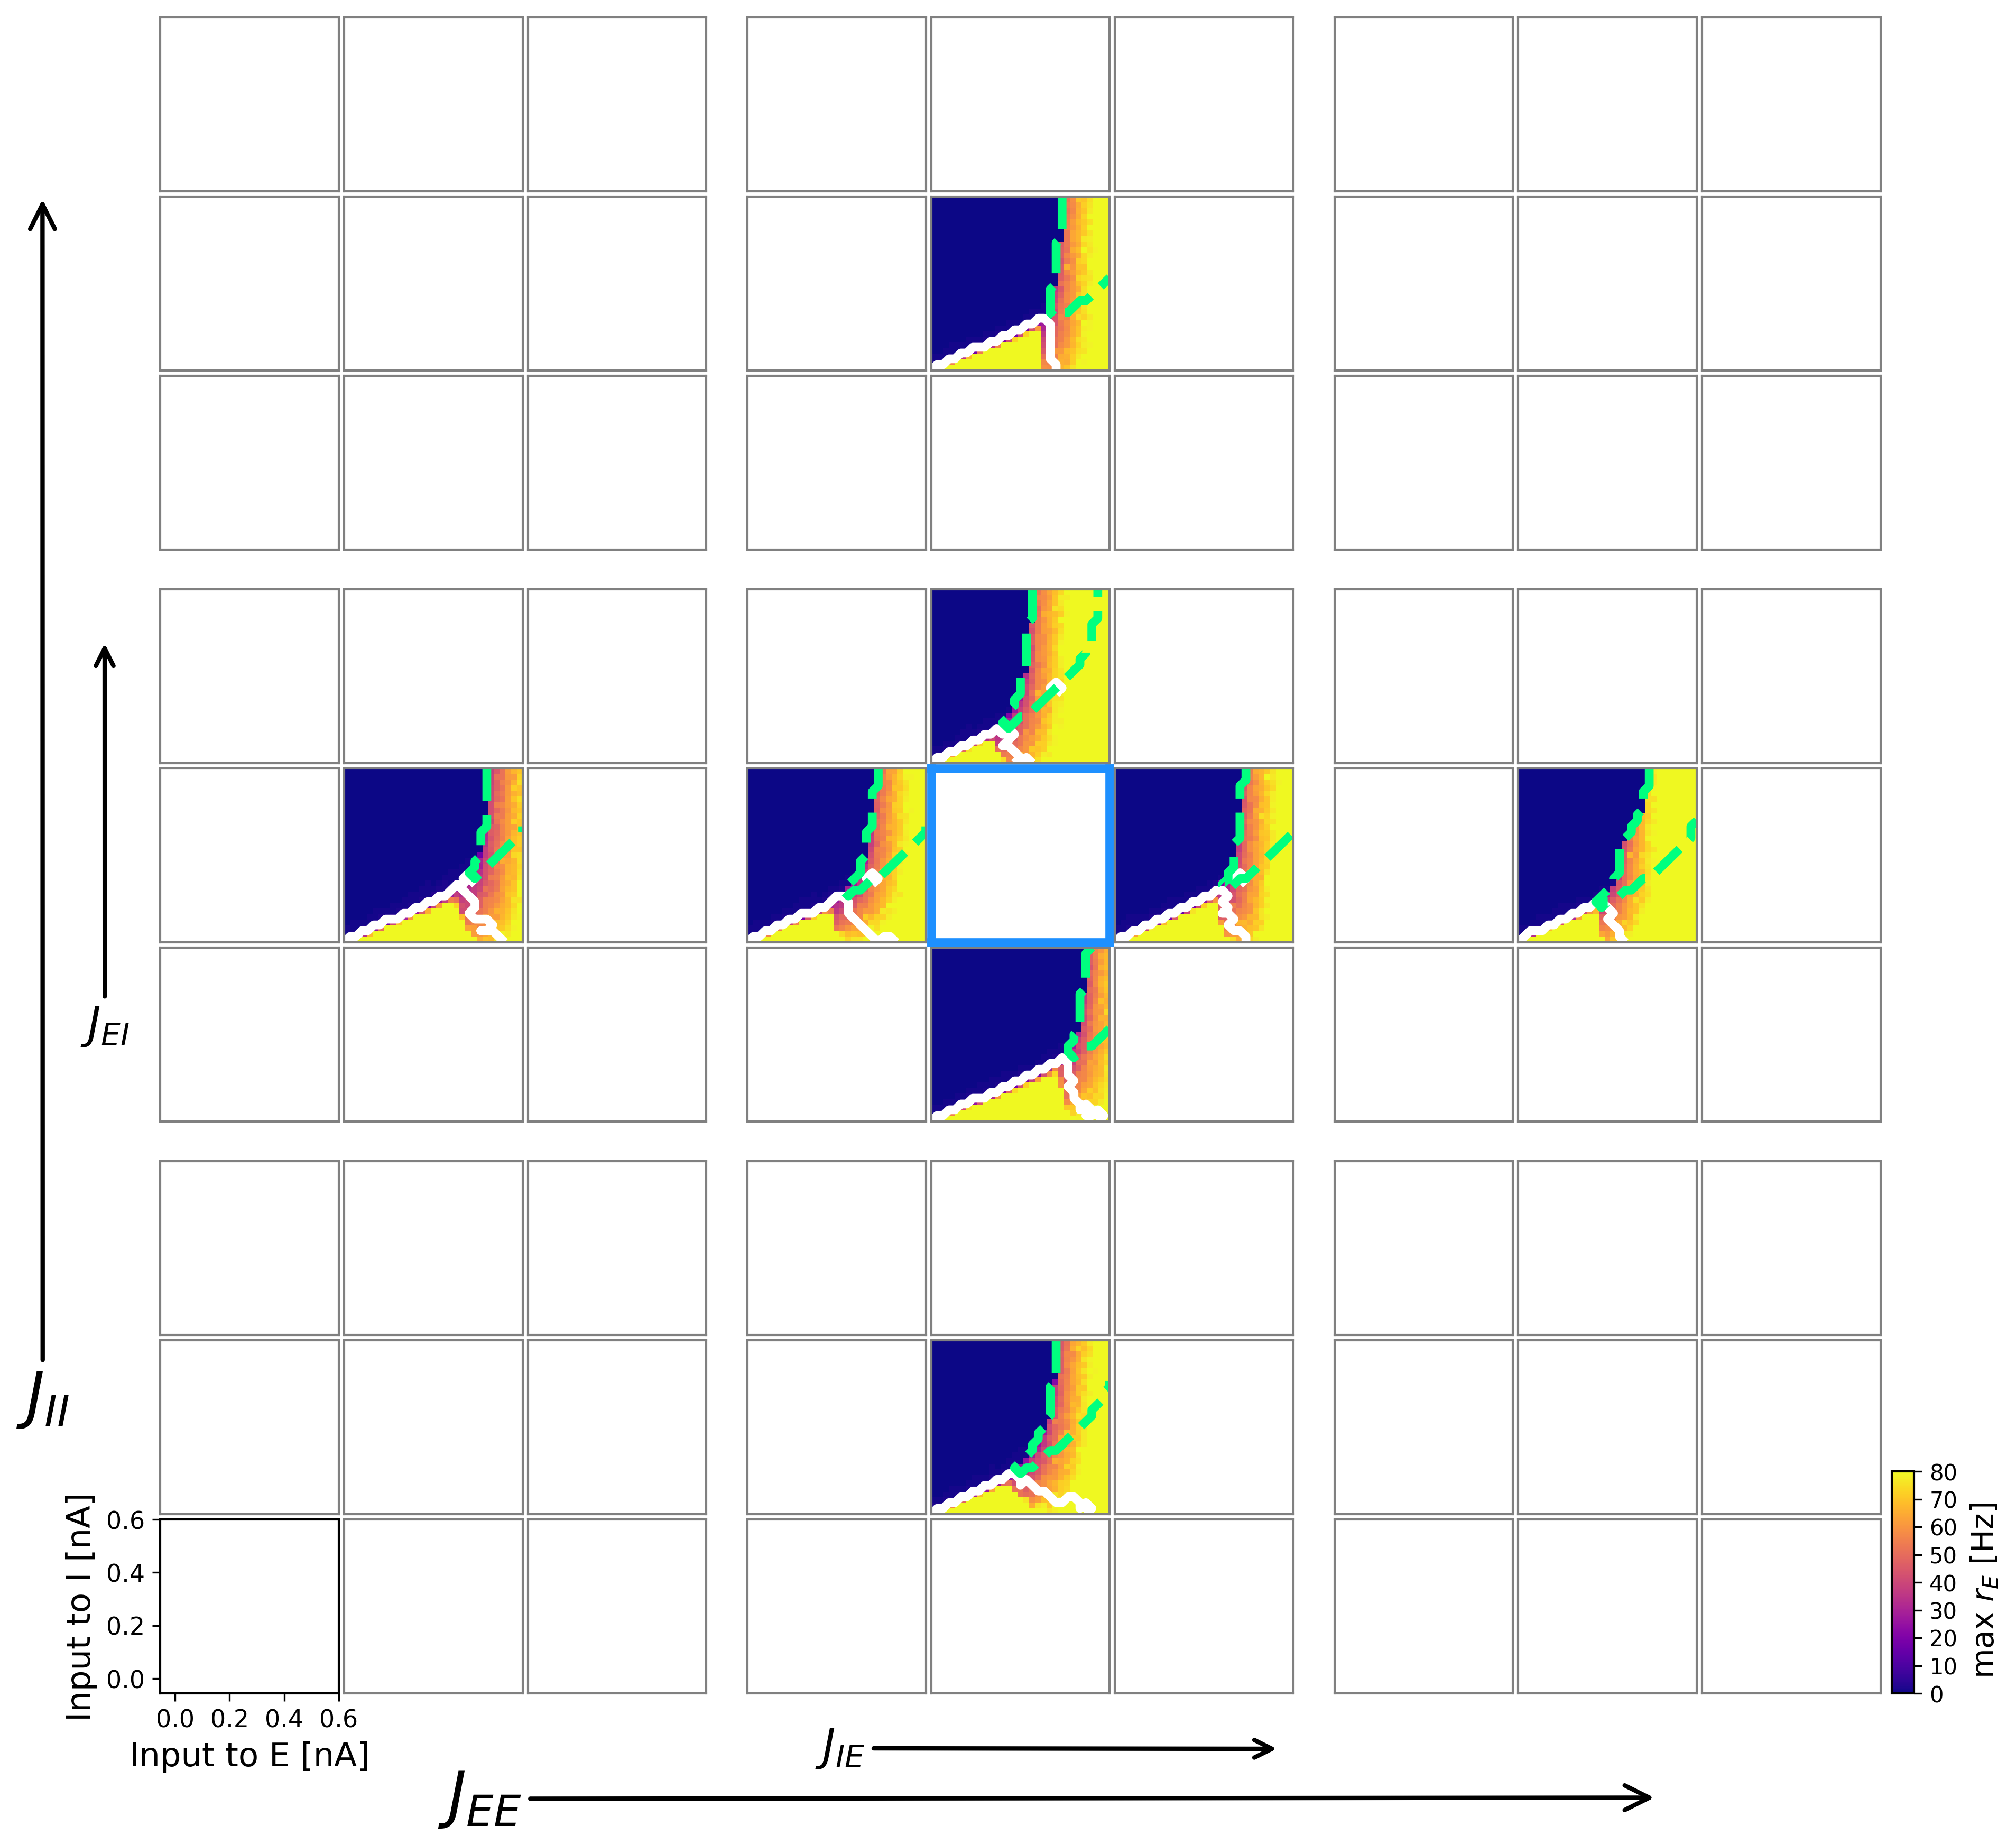

In [95]:
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects
import string
labels = [l for l in string.ascii_lowercase]

Jee_range = np.unique(dfResults.Jee_max)
Jii_range = np.unique(dfResults.Jii_max)
Jei_range = np.unique(dfResults.Jei_max)
Jie_range = np.unique(dfResults.Jie_max)

fig = plt.figure(figsize=(14, 14), dpi=300)
outer_grid = gridspec.GridSpec(len(Jee_range),len(Jii_range), wspace=0.075, hspace=0.075)

n_plot = -1

for yg, jii in enumerate(Jii_range): #zip(range(len(a_range))[::-1], a_range): 
    yg_flipped = len(Jii_range)-1-yg # flip for plotting, because gridspec (0,0) is upper left...
    for xg, jee in enumerate(Jee_range):
        #print(yg, xg, 'pars', 'Jee', jee, 'Jii', jii)
        wspace = 0.03
        hspace = 0.03
        if (xg, yg) == (1, 1):
            wspace, hspace = 0.03, 0.03
            
        inner_grid = gridspec.GridSpecFromSubplotSpec(len(Jei_range),len(Jie_range), subplot_spec=outer_grid[yg_flipped, xg], wspace=wspace, hspace=hspace)
        
        for ygi, jei in enumerate(Jei_range): #zip(range(len(a_range))[::-1], a_range): 
            ygi_flipped = len(Jei_range)-1-ygi # flip for plotting, because gridspec (0,0) is upper left...
            for xgi, jie in enumerate(Jie_range):
                n_plot+=1
                print("{}{}{}{} | {}: Plotting Jii {} Jee {} Jei {} Jie {}".format(yg, xg, ygi, xgi, n_plot, jii, jee, jei, jie))
                selector = (dfResults.Jee_max==jee) & (dfResults.Jii_max==jii) & (dfResults.Jei_max==jei) &(dfResults.Jie_max==jie)
                selectedResults = dfResults[selector]
                selectIndices = selectedResults.index
                
                if (yg, xg, ygi, xgi) == (1, 1, 1, 1): # make the axis of the middle plot thicker
                    plt.rc('axes', linewidth=4)
                else:
                    plt.rc('axes', linewidth=1)  
                    
                ax = plt.subplot(inner_grid[ygi_flipped, xgi]) # stupid: gridspec takes y first, then x ...               
                
                try:
                    imPlot = plotResults(selectedResults, 'max_exc', ax, (xg, yg, xgi, ygi))
                except:
                    print("no existooo!")
                
                
                #ax.text(0.15, 0.85, n_plot, horizontalalignment='center', color='white', verticalalignment='center', transform=ax.transAxes)
#fig.tight_layout(pad=4.0, w_pad=0.5, h_pad=0.5)     


# colorbars
from mpl_toolkits.axes_grid1 import make_axes_locatable
cax=fig.add_axes([0.905,0.125,0.01,0.1])  ## the parameters are the specified position you set 
fig.colorbar(imPlot, cax=cax)
fig.text(0.94, 0.2, 'max $r_E$ [Hz]', rotation=90, color='black', size=14)

# outer grid a and b
bbox_props = dict(boxstyle="square,pad=0.1", fc="white", lw=1)
bbox_props = None

plt.annotate("$J_{EE}$",size=28, bbox=bbox_props,
            xy=(0.8, 0.078), xycoords=fig.transFigure,
            xytext=(0.25, 0.07), textcoords=fig.transFigure,                 
            arrowprops=dict(arrowstyle="->", lw=2))

plt.annotate("$J_{IE}$",size=20, bbox=bbox_props,
            xy=(0.63, 0.1), xycoords=fig.transFigure,
            xytext=(0.42, 0.095), textcoords=fig.transFigure,                 
            arrowprops=dict(arrowstyle="->", lw=2))
#plt.annotate("Spike-triggered adaptation [pA]", size=18, xy=(0.4, 0.04), xycoords=fig.transFigure)

plt.annotate("$J_{II}$",size=28, bbox=bbox_props,
            xy=(0.072, 0.8), xycoords=fig.transFigure,
            xytext=(0.06, 0.25), textcoords=fig.transFigure,                 
            arrowprops=dict(arrowstyle="->", lw=2))

plt.annotate("$J_{EI}$",size=20, bbox=bbox_props,
            xy=(0.1, 0.6), xycoords=fig.transFigure,
            xytext=(0.089, 0.42), textcoords=fig.transFigure,                 
            arrowprops=dict(arrowstyle="->", lw=2))

#plt.annotate("Subthreshold adaptation [nS]", size=18, xy=(0.02, 0.66), rotation=90, xycoords=fig.transFigure)
plt.savefig(os.path.join(paths.FIGURES_DIR, 'changing-J-bifurcation-diagram_adex.png'))
plt.savefig(os.path.join(paths.FIGURES_DIR, 'changing-J-bifurcation-diagram_adex.svg'))
plt.savefig(os.path.join(paths.FIGURES_DIR, 'changing-J-bifurcation-diagram_adex.eps'))

In [94]:
paths.FIGURES_DIR

'./figures/'